<a href="https://colab.research.google.com/github/PauloDaguvnor/Diabetes-Classification-With-ML/blob/main/ML_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# scipy
import scipy
# numpy
import numpy as np
# matplotlib
import matplotlib
# pandas
import pandas
# statsmodels
import statsmodels
# scikit-learn
import sklearn

In [3]:
#Import And Read the Male Visceral Fat Dataset
import pandas as pd
vdata  = pd.read_csv('/content/sample_data/Raw_Males_VF_Dataset_Coursework1.csv')
vdata.head(10)

,SUBJECT_ID,SEX,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,DISCONTINUED_NO_,CIGARETTES_CONSUMED_PER_DAY,Visceral_Fat_Volume_Litres
0,B0011,M,47,46,187.0,152.24,154,133,178.0,52,7,0.0,XNBH,NaN,-0.76
1,B0012,M,52,54,182.0,167.36,139,111,187.0,50,3,0.0,NaN,NaN,-0.59
2,B0013,M,62,28,175.0,82.92,93,118,160.0,58,6,0.0,NaN,NaN,0.59
3,B0014,M,56,26,1.8,76.45,85,91,139.0,151,2,0.0,NaN,NaN,0.50
4,B0015,M,48,25,1.7,65.36,84,76,98.0,257,6,0.0,NaN,NaN,0.39
5,B0016,M,70,27,180.0,76.57,95,83,127.0,68,5,0.0,NaN,NaN,0.27
6,B0017,M,65,21,189.0,63.37,76,93,123.0,85,3,0.0,NaN,NaN,0.24
7,B0018,M,54,24,192.0,81.79,87,81,123.0,38,10,0.0,NaN,NaN,0.23
8,B0019,M,49,23,189.0,74.41,80,95,136.0,44,3,0.0,NaN,NaN,0.22
9,B0020,M,57,26,188.0,84.00,91,82,109.0,61,0,0.0,NaN,NaN,0.18


In [4]:
#Find the sum of NULL values across the rows
vdata.isna().sum()

SUBJECT_ID                            0
SEX                                   0
AGE_years                             0
BMI                                   0
HEIGHT_cm                             0
WEIGHT_kg                             0
WAIST_CIRCUMFERENCE_cm                0
DIASTOLIC_BLOOD_PRESSURE_mmHg         0
SYSTOLIC_BLOOD_PRESSURE_mmHg          5
WALK_DURATION_PER_DAY_MINUTES         0
COMPUTER_USE_TIME_PER_DAY_HOURS       0
SMOKING_STATUS                        2
DISCONTINUED_NO_                   2862
CIGARETTES_CONSUMED_PER_DAY        2735
Visceral_Fat_Volume_Litres            0
dtype: int64

In [ ]:
#Drop the DISCONTINUED_NO_','CIGARETTES_CONSUMED_PER_DAY and SEX columns
df = vdata.drop(['DISCONTINUED_NO_','CIGARETTES_CONSUMED_PER_DAY','SEX'], axis=1)

In [ ]:
#view dataset
df.head(10)

,SUBJECT_ID,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,Visceral_Fat_Volume_Litres
0,B0011,47,46,187.0,152.24,154,133,178.0,52,7,0.0,-0.76
1,B0012,52,54,182.0,167.36,139,111,187.0,50,3,0.0,-0.59
2,B0013,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0.59
3,B0014,56,26,1.8,76.45,85,91,139.0,151,2,0.0,0.50
4,B0015,48,25,1.7,65.36,84,76,98.0,257,6,0.0,0.39
5,B0016,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0.27
6,B0017,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0.24
7,B0018,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0.23
8,B0019,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0.22
9,B0020,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0.18


In [ ]:
#Check for null values
df.isna().sum()

SUBJECT_ID                         0
AGE_years                          0
BMI                                0
HEIGHT_cm                          0
WEIGHT_kg                          0
WAIST_CIRCUMFERENCE_cm             0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0
SYSTOLIC_BLOOD_PRESSURE_mmHg       5
WALK_DURATION_PER_DAY_MINUTES      0
COMPUTER_USE_TIME_PER_DAY_HOURS    0
SMOKING_STATUS                     2
Visceral_Fat_Volume_Litres         0
dtype: int64

In [ ]:
#Replace Null values in the Systolic Blood Pressure and Smoking Status with Mean and Mode respectively
df['SYSTOLIC_BLOOD_PRESSURE_mmHg'] = df['SYSTOLIC_BLOOD_PRESSURE_mmHg'].fillna(df['SYSTOLIC_BLOOD_PRESSURE_mmHg'].mean())
df['SMOKING_STATUS '] = df['SMOKING_STATUS '].fillna(df['SMOKING_STATUS '].mode()[0])

In [ ]:
df.isna().sum()

SUBJECT_ID                         0
AGE_years                          0
BMI                                0
HEIGHT_cm                          0
WEIGHT_kg                          0
WAIST_CIRCUMFERENCE_cm             0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0
WALK_DURATION_PER_DAY_MINUTES      0
COMPUTER_USE_TIME_PER_DAY_HOURS    0
SMOKING_STATUS                     0
Visceral_Fat_Volume_Litres         0
dtype: int64

In [ ]:
#View Data
df.head(3)

,SUBJECT_ID,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,Visceral_Fat_Volume_Litres
0,B0011,47,46,187.0,152.24,154,133,178.0,52,7,0.0,-0.76
1,B0012,52,54,182.0,167.36,139,111,187.0,50,3,0.0,-0.59
2,B0013,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0.59


In [ ]:
#Shape Of New Data
df.shape

(2864, 12)

# Removing Outliers

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2864.0,62.324721,8.509000,41.00,57.0000,63.000,69.0000,190.00
BMI,2864.0,29.284567,3.885323,20.00,27.0000,29.000,31.0000,54.00
HEIGHT_cm,2864.0,182.935929,8.671651,1.70,178.0000,183.000,188.0000,210.00
WEIGHT_kg,2864.0,91.345150,13.678241,55.41,81.9175,89.725,98.7400,168.77
WAIST_CIRCUMFERENCE_cm,2864.0,99.055168,10.137395,70.00,92.0000,98.000,105.0000,154.00
DIASTOLIC_BLOOD_PRESSURE_mmHg,2864.0,91.596718,10.631628,48.00,84.0000,91.000,99.0000,133.00
SYSTOLIC_BLOOD_PRESSURE_mmHg,2864.0,133.770199,16.819874,90.00,122.0000,132.000,144.0000,192.00
WALK_DURATION_PER_DAY_MINUTES,2864.0,81.696578,64.805761,1.00,46.0000,67.000,92.0000,656.00
COMPUTER_USE_TIME_PER_DAY_HOURS,2864.0,4.531425,4.421835,0.00,2.0000,3.000,6.0000,69.00
SMOKING_STATUS,2864.0,0.040503,0.197170,0.00,0.0000,0.000,0.0000,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

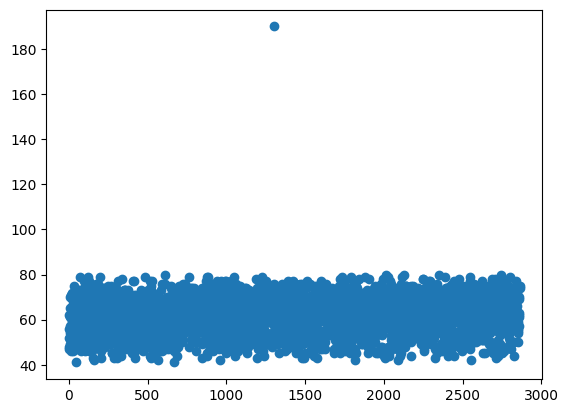

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(df.index,df['AGE_years'])
plt.show

In [ ]:
#Using drop() to delete rows based on column value
df.drop(df[df['AGE_years'] >= 120].index, inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

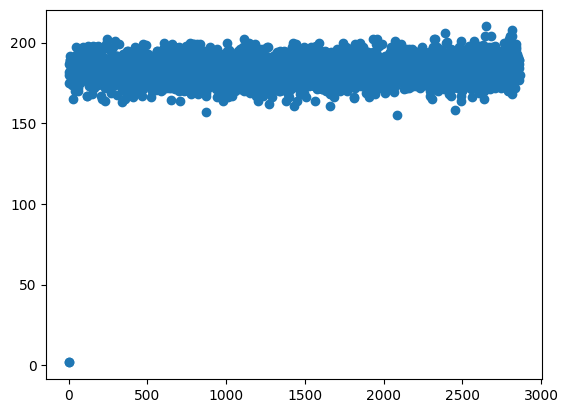

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(df.index,df['HEIGHT_cm'])
plt.show

In [ ]:
#Using drop() to delete rows based on column value
df.drop(df[df['HEIGHT_cm'] <= 20].index, inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

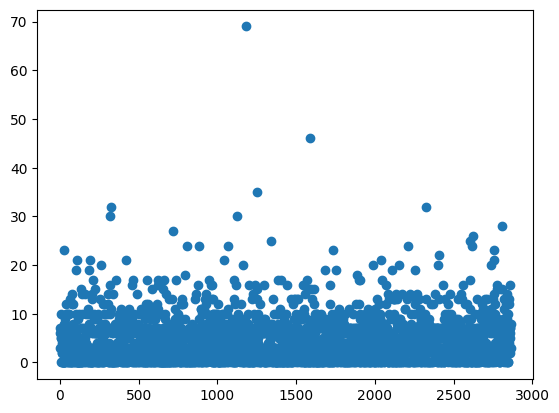

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(df.index,df['COMPUTER_USE_TIME_PER_DAY_HOURS'])
plt.show

In [ ]:
#Using drop() to delete rows based on column value
df.drop(df[df['COMPUTER_USE_TIME_PER_DAY_HOURS'] > 24].index, inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

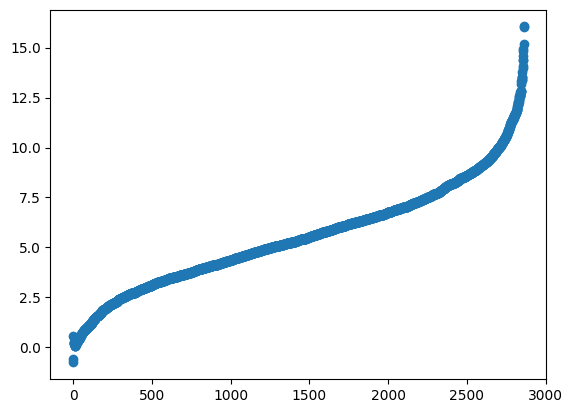

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(df.index,df['Visceral_Fat_Volume_Litres'])
plt.show

In [ ]:
#Using drop() to delete rows based on column value
df.drop(df[df['Visceral_Fat_Volume_Litres'] < 0].index, inplace = True)

In [ ]:
#CHECK FOR Outliers
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2847.0,62.325255,8.151172,41.00,57.000,63.00,69.000,80.00
BMI,2847.0,29.273973,3.849884,20.00,27.000,29.00,31.000,51.00
HEIGHT_cm,2847.0,183.049350,7.213319,155.00,178.000,183.00,188.000,210.00
WEIGHT_kg,2847.0,91.311826,13.548008,55.41,81.925,89.73,98.720,168.77
WAIST_CIRCUMFERENCE_cm,2847.0,99.030207,10.052207,70.00,92.000,98.00,105.000,153.00
DIASTOLIC_BLOOD_PRESSURE_mmHg,2847.0,91.598174,10.591009,48.00,84.000,91.00,98.500,130.00
SYSTOLIC_BLOOD_PRESSURE_mmHg,2847.0,133.786741,16.738080,90.00,122.000,132.00,144.000,192.00
WALK_DURATION_PER_DAY_MINUTES,2847.0,81.706006,64.870699,1.00,46.000,67.00,92.000,656.00
COMPUTER_USE_TIME_PER_DAY_HOURS,2847.0,4.408851,3.929817,0.00,2.000,3.00,6.000,24.00
SMOKING_STATUS,2847.0,0.040745,0.197733,0.00,0.000,0.00,0.000,1.00


In [ ]:
# create a list of our conditions
conditions = [
    (df['Visceral_Fat_Volume_Litres'] <= 3),
    (df['Visceral_Fat_Volume_Litres'] > 3)
    ]

# create a list of the values we want to assign for each condition
# Where 1 represent YES and 0 represent NO
values = [0,1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['req_intervention'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,SUBJECT_ID,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,Visceral_Fat_Volume_Litres,req_intervention
2,B0013,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0.59,0
5,B0016,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0.27,0
6,B0017,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0.24,0
7,B0018,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0.23,0
8,B0019,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0.22,0


In [ ]:
#Drop Visceral Fat Volume column
df.drop(['Visceral_Fat_Volume_Litres'], axis=1,inplace = True)

In [ ]:
# display updated DataFrame
df.head(10)

,SUBJECT_ID,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,req_intervention
2,B0013,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0
5,B0016,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0
6,B0017,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0
7,B0018,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0
8,B0019,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0
9,B0020,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0
10,B0021,61,23,180.0,71.71,85,78,112.0,175,5,0.0,0
11,B0022,52,24,186.0,75.94,81,103,138.0,43,5,0.0,0
12,B0023,54,27,177.0,75.32,91,102,144.0,78,0,0.0,0
13,B0024,53,24,188.0,82.55,87,78,123.0,46,2,0.0,0


In [ ]:
#Decribe the Datatset statistically
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2847.0,62.325255,8.151172,41.00,57.000,63.00,69.00,80.00
BMI,2847.0,29.273973,3.849884,20.00,27.000,29.00,31.00,51.00
HEIGHT_cm,2847.0,183.049350,7.213319,155.00,178.000,183.00,188.00,210.00
WEIGHT_kg,2847.0,91.311826,13.548008,55.41,81.925,89.73,98.72,168.77
WAIST_CIRCUMFERENCE_cm,2847.0,99.030207,10.052207,70.00,92.000,98.00,105.00,153.00
DIASTOLIC_BLOOD_PRESSURE_mmHg,2847.0,91.598174,10.591009,48.00,84.000,91.00,98.50,130.00
SYSTOLIC_BLOOD_PRESSURE_mmHg,2847.0,133.786741,16.738080,90.00,122.000,132.00,144.00,192.00
WALK_DURATION_PER_DAY_MINUTES,2847.0,81.706006,64.870699,1.00,46.000,67.00,92.00,656.00
COMPUTER_USE_TIME_PER_DAY_HOURS,2847.0,4.408851,3.929817,0.00,2.000,3.00,6.00,24.00
SMOKING_STATUS,2847.0,0.040745,0.197733,0.00,0.000,0.00,0.00,1.00


In [ ]:
#Create a dataset with the numeric columns only
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

#Display the numeric columns only
numeric.head(10)


,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,req_intervention
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0
7,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0
8,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0
9,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0
10,61,23,180.0,71.71,85,78,112.0,175,5,0.0,0
11,52,24,186.0,75.94,81,103,138.0,43,5,0.0,0
12,54,27,177.0,75.32,91,102,144.0,78,0,0.0,0
13,53,24,188.0,82.55,87,78,123.0,46,2,0.0,0


In [ ]:
#View Types of columns
df.dtypes

SUBJECT_ID                          object
AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
req_intervention                     int64
dtype: object

In [ ]:
#Display columns in the numeric dataset
numeric.columns

Index(['AGE_years', 'BMI ', 'HEIGHT_cm', 'WEIGHT_kg', 'WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'SMOKING_STATUS ', 'req_intervention'],
      dtype='object')

In [ ]:
#Display Numeric columns
numeric.head(10)

,AGE_years,BMI,HEIGHT_cm,WEIGHT_kg,WAIST_CIRCUMFERENCE_cm,DIASTOLIC_BLOOD_PRESSURE_mmHg,SYSTOLIC_BLOOD_PRESSURE_mmHg,WALK_DURATION_PER_DAY_MINUTES,COMPUTER_USE_TIME_PER_DAY_HOURS,SMOKING_STATUS,req_intervention
2,62,28,175.0,82.92,93,118,160.0,58,6,0.0,0
5,70,27,180.0,76.57,95,83,127.0,68,5,0.0,0
6,65,21,189.0,63.37,76,93,123.0,85,3,0.0,0
7,54,24,192.0,81.79,87,81,123.0,38,10,0.0,0
8,49,23,189.0,74.41,80,95,136.0,44,3,0.0,0
9,57,26,188.0,84.00,91,82,109.0,61,0,0.0,0
10,61,23,180.0,71.71,85,78,112.0,175,5,0.0,0
11,52,24,186.0,75.94,81,103,138.0,43,5,0.0,0
12,54,27,177.0,75.32,91,102,144.0,78,0,0.0,0
13,53,24,188.0,82.55,87,78,123.0,46,2,0.0,0


In [ ]:
#Splitting the data
#split dataset in features and target variable
feature_cols = ['AGE_years', 'BMI ','WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'SMOKING_STATUS ']
X = numeric[feature_cols] # Features
y = numeric.req_intervention # Target variable


In [ ]:
#Normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=0)


In [ ]:
# # import the class
# from sklearn.linear_model import LogisticRegression

# # instantiate the model (using the default parameters)
# logreg = LogisticRegression()
# logreg.fit(X1_train, y_train)

# y_pred=logreg.predict(X1_test)

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test,y_pred)
# print (accuracy)

# # import the metrics class
# from sklearn import metrics
# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix

0.8549707602339182


array([[ 34, 101],
       [ 23, 697]])

Text(0.5, 427.9555555555555, 'Predicted label')

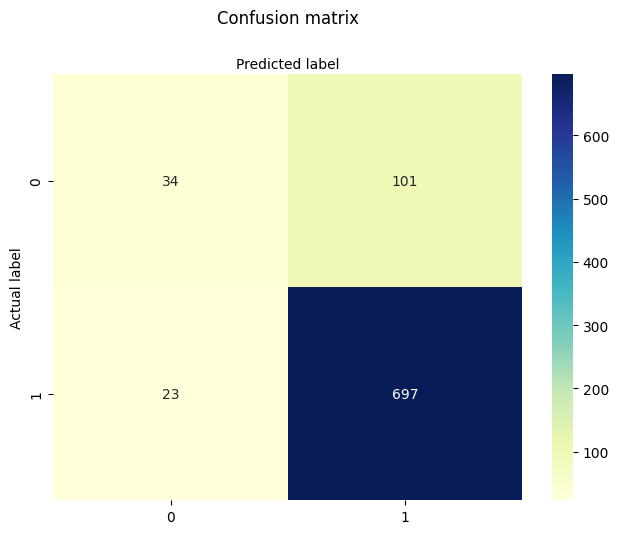

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8549707602339182
Precision: 0.8734335839598998
Recall: 0.9680555555555556
F1 Score: 0.9183135704874835


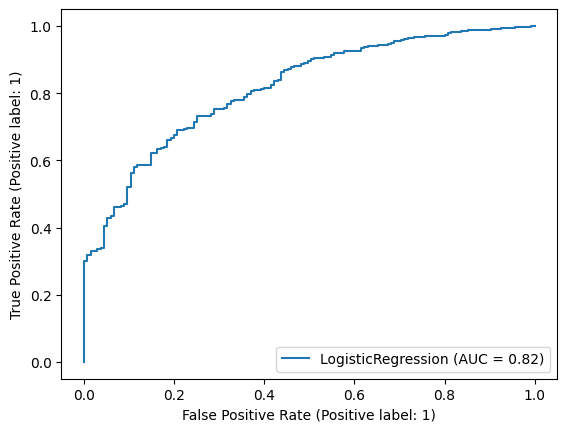

In [ ]:
#import library to plot and Display ROC curve
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, X1_test, y_test)
plt.show()

# Decision Tree Classifier

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#split dataset in features and target variable
feature_columns = ['AGE_years', 'BMI ','WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'SMOKING_STATUS ']
X5 = numeric[feature_columns] # Features
y5 = numeric.req_intervention # Target variable

In [ ]:
# Split dataset into training set and test set
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X5_train,y5_train)

#Predict the response for test dataset
y5_pred = clf.predict(X5_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))

Accuracy: 0.7684210526315789


In [ ]:
#Optimising Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X5_train,y5_train)

#Predict the response for test dataset
y5_pred = clf.predict(X5_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))

Accuracy: 0.8654970760233918


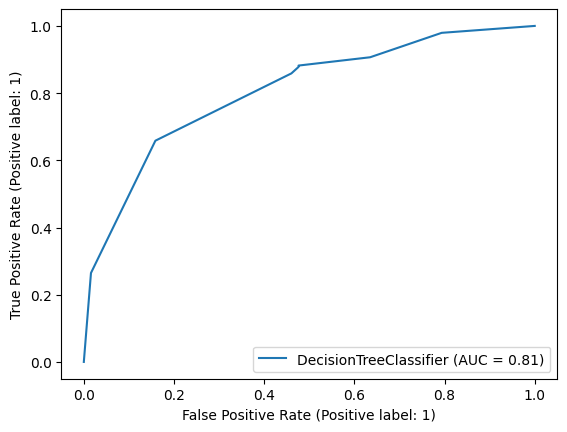

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X5_test, y5_test)

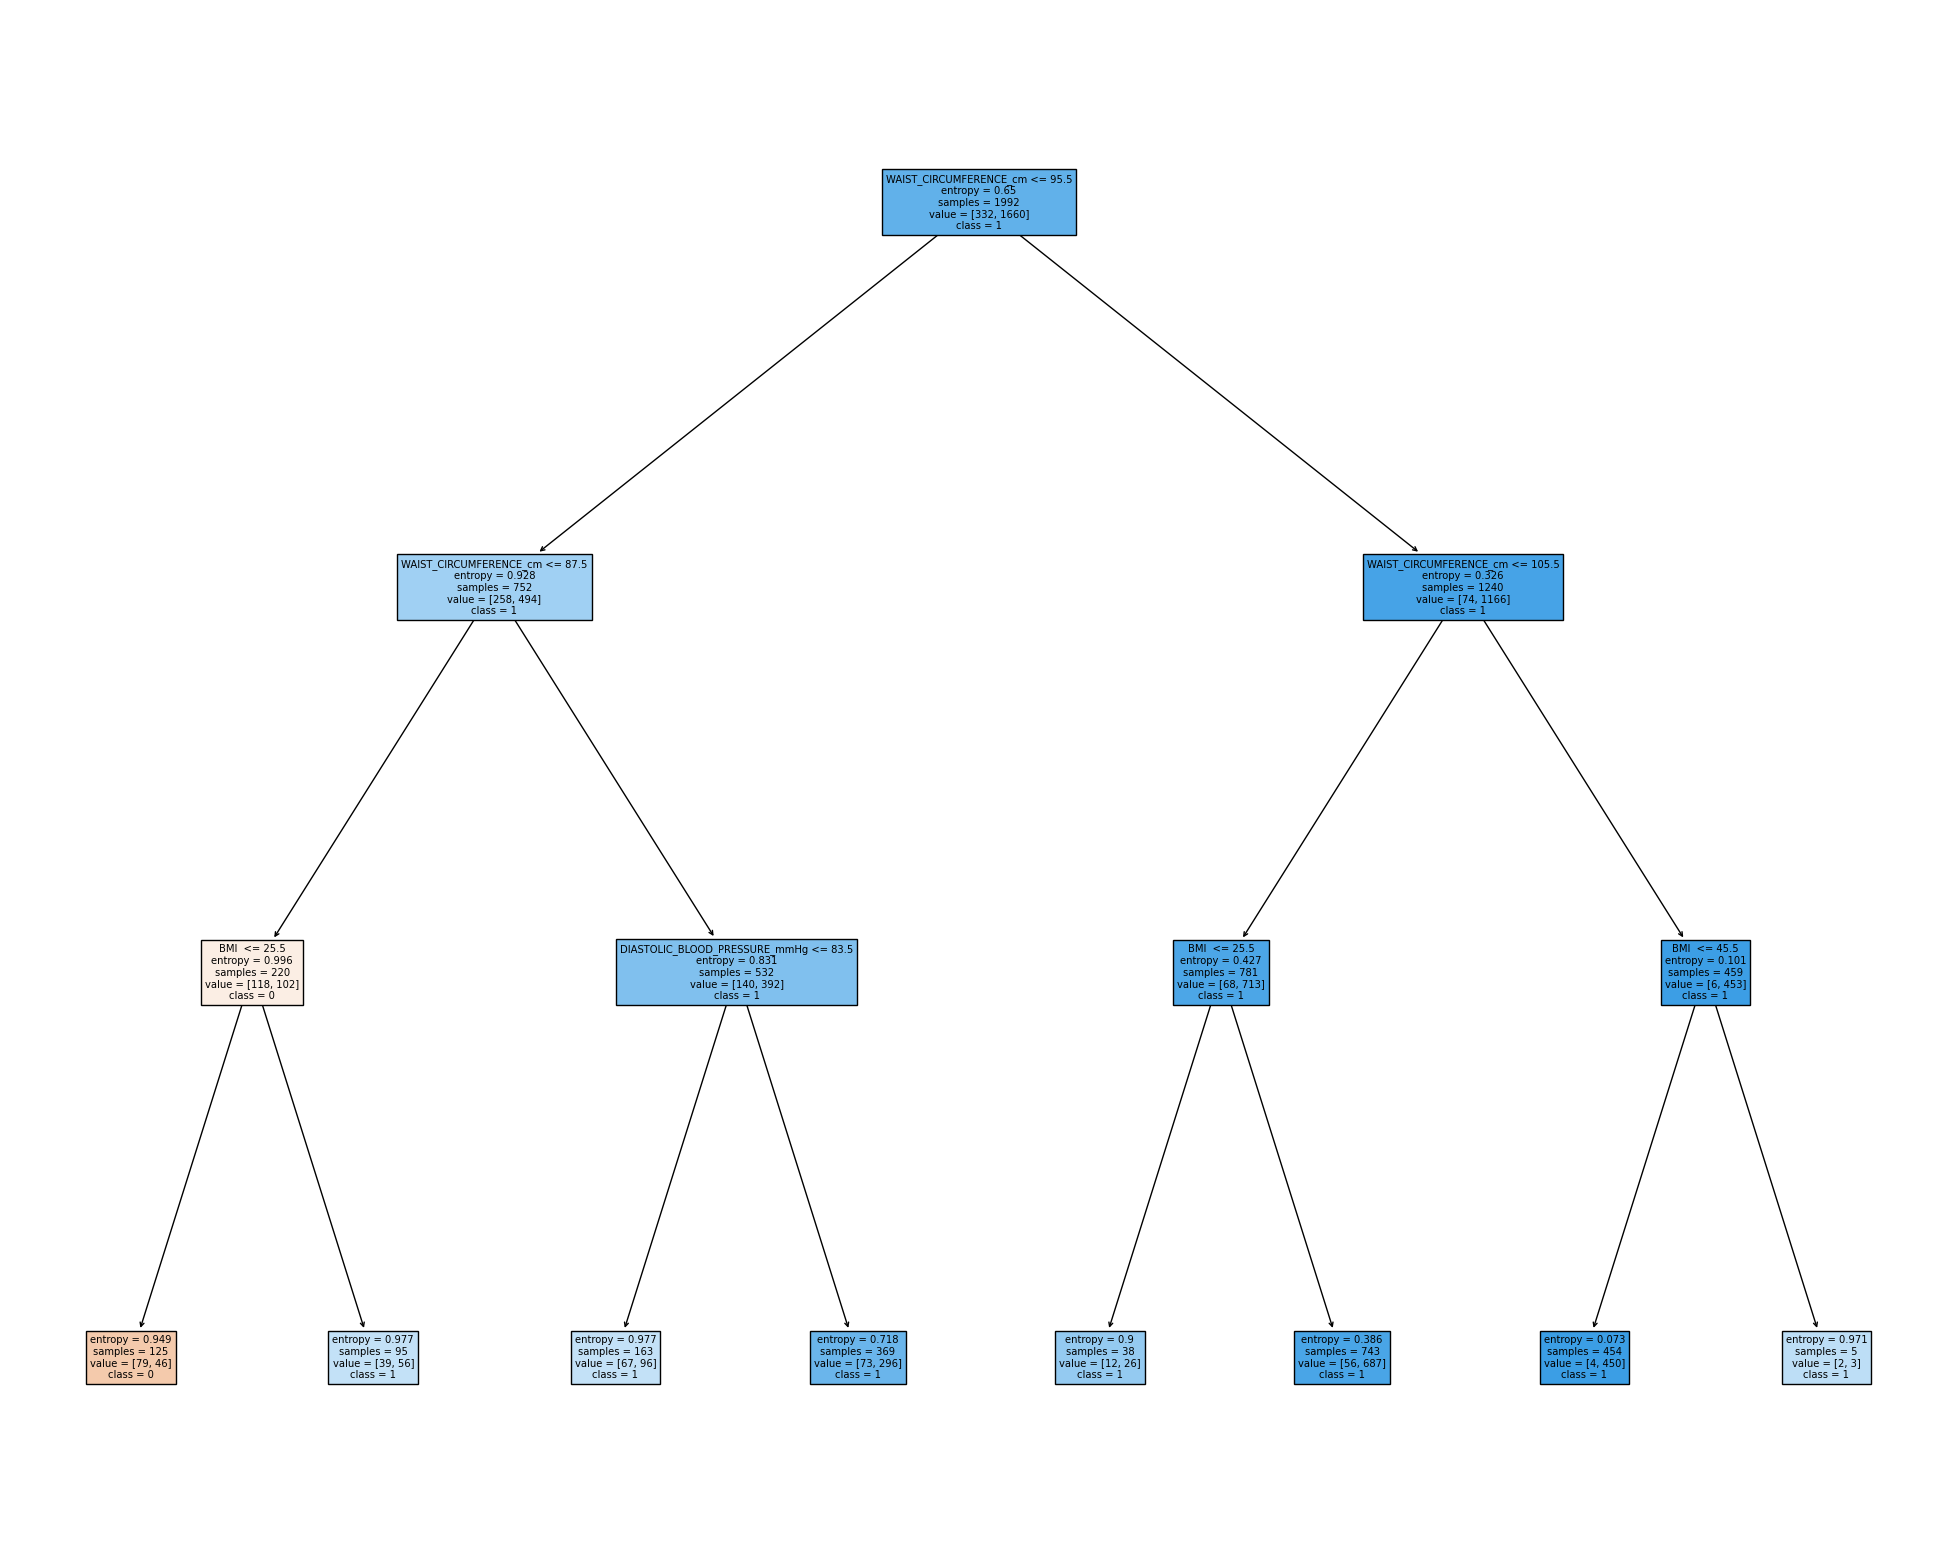

In [ ]:
#Visualizing Decision Trees
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_columns,
                   class_names=['0','1'],
                   filled=True)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8549707602339182
Precision: 0.8734335839598998
Recall: 0.9680555555555556
F1 Score: 0.9183135704874835


# KNN Classifier

In [ ]:
#Splitting the data
#split dataset in features and target variable
feature_cols = ['AGE_years', 'BMI ','WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'SMOKING_STATUS ']
x = numeric[feature_cols] # Features
y = numeric['req_intervention'].values # Target variable

In [ ]:
# Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(x_test)[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)

0.8333333333333334

Text(0, 0.5, 'Mean Error')

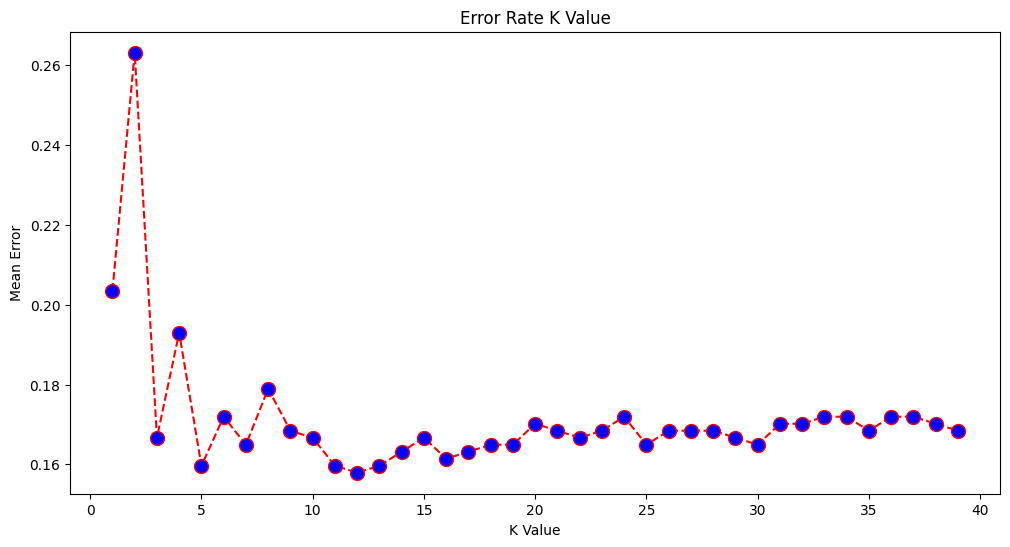

In [ ]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2)
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.58421053 0.66666667 0.76625659 0.78910369 0.82952548]
cv_scores mean:0.7271525914963155


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 17}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8426528535750624

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2)
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.58421053 0.66666667 0.76625659 0.78910369 0.82952548]
cv_scores mean:0.7271525914963155


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 17}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8426528535750624

In [ ]:
# from sklearn.metrics import RocCurveDisplay
# RocCurveDisplay.from_estimator(knn, x_test, y_test)

# Gaussian Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
yg_pred = nb.fit(x_train, y_train)

In [ ]:
#Accuracy
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.8157894736842105


# Artificial Neural Networks

In [ ]:
target_column = ['req_intervention']
predictors = list(set(list(numeric.columns))-set(target_column))

In [ ]:
predictors

['WEIGHT_kg',
 'WALK_DURATION_PER_DAY_MINUTES',
 'SMOKING_STATUS ',
 'AGE_years',
 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
 'WAIST_CIRCUMFERENCE_cm',
 'COMPUTER_USE_TIME_PER_DAY_HOURS',
 'DIASTOLIC_BLOOD_PRESSURE_mmHg',
 'BMI ',
 'HEIGHT_cm']

In [ ]:
numeric[predictors] = numeric[predictors]/numeric[predictors].max()
numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE_years,2864.0,0.328025,0.044784,0.215789,0.300000,0.331579,0.363158,1.0
BMI,2864.0,0.542307,0.071950,0.370370,0.500000,0.537037,0.574074,1.0
HEIGHT_cm,2864.0,0.871123,0.041294,0.008095,0.847619,0.871429,0.895238,1.0
WEIGHT_kg,2864.0,0.541240,0.081047,0.328317,0.485380,0.531641,0.585057,1.0
WAIST_CIRCUMFERENCE_cm,2864.0,0.643215,0.065827,0.454545,0.597403,0.636364,0.681818,1.0
DIASTOLIC_BLOOD_PRESSURE_mmHg,2864.0,0.688697,0.079937,0.360902,0.631579,0.684211,0.744361,1.0
SYSTOLIC_BLOOD_PRESSURE_mmHg,2864.0,0.696720,0.087604,0.468750,0.635417,0.687500,0.750000,1.0
WALK_DURATION_PER_DAY_MINUTES,2864.0,0.124537,0.098789,0.001524,0.070122,0.102134,0.140244,1.0
COMPUTER_USE_TIME_PER_DAY_HOURS,2864.0,0.065673,0.064085,0.000000,0.028986,0.043478,0.086957,1.0
SMOKING_STATUS,2864.0,0.040503,0.197170,0.000000,0.000000,0.000000,0.000000,1.0


In [ ]:
X2 = numeric[predictors].values
y2 = numeric[target_column].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=40)
print(X2_train.shape);
print(X2_test.shape)

(2004, 10)
(860, 10)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X2_train,y2_train)

predict_train = mlp.predict(X2_train)
predict_test = mlp.predict(X2_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Print Confusion Matrix for ANN
from sklearn.metrics import classification_report,confusion_matrix
an_mx = confusion_matrix(y2_train,predict_train) #Ask Habeeb
re_mx = classification_report(y2_train,predict_train)
print(an_mx)
print(re_mx)

[[  66  260]
 [  35 1643]]
              precision    recall  f1-score   support

           0       0.65      0.20      0.31       326
           1       0.86      0.98      0.92      1678

    accuracy                           0.85      2004
   macro avg       0.76      0.59      0.61      2004
weighted avg       0.83      0.85      0.82      2004



Text(0.5, 427.9555555555555, 'Predicted label')

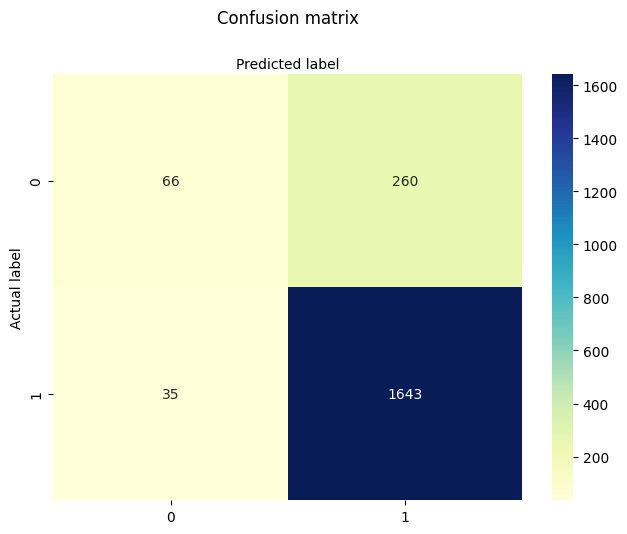

In [ ]:
#Display COnfusion Matrix for ANN
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(an_mx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(confusion_matrix(y2_test,predict_test))
print(classification_report(y2_test,predict_test))

[[ 28 110]
 [ 19 703]]
              precision    recall  f1-score   support

           0       0.60      0.20      0.30       138
           1       0.86      0.97      0.92       722

    accuracy                           0.85       860
   macro avg       0.73      0.59      0.61       860
weighted avg       0.82      0.85      0.82       860



# Finetuning With Grid Search

In [ ]:
# # Import required libraries
# from sklearn.neural_network import MLPClassifier
# from sklearn.neural_network import MLPRegressor

# # Import necessary modules
# from sklearn.model_selection import train_test_split
# #from sklearn.metrics import mean_squared_error
# from math import sqrt
# #from sklearn.metrics import r2_score

In [ ]:
# #Let’s set up and split our Data and our Labels
# X3 = numeric[predictors]
# y3 = numeric['req_intervention']

# from sklearn.model_selection import train_test_split
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)

In [ ]:
# %%time

# from sklearn.model_selection import GridSearchCV

# params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
#           'hidden_layer_sizes': [(13,), (50,100,), (50,75,100,)],
#           'solver': ['adam', 'sgd', 'lbfgs'],
#           'learning_rate' : ['constant', 'adaptive', 'invscaling'],
#           'max_iter': [500]
#          }

# mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# mlp_classif_grid.fit(X3_train,y3_train)

# print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X3_train, y3_train))
# print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X3_test, y3_test))
# print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
# print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train Accuracy : 0.861
Test Accuracy : 0.838
Best Accuracy Through Grid Search : 0.859
Best Parameters :  {'activation': 'identity', 'hidden_layer_sizes': (13,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}
CPU times: user 7.43 s, sys: 1.01 s, total: 8.44 s
Wall time: 17min 35s


In [ ]:
# mlp = MLPClassifier(activation= 'relu', hidden_layer_sizes= (13,), learning_rate='constant', solver='lbfgs', max_iter=500)
# mlp.fit(X3_train,y3_train)

MLPClassifier(hidden_layer_sizes=(13,), max_iter=500, solver='lbfgs')

In [ ]:
# #Predictions
# predictions = mlp.predict(X3_test)

In [ ]:
# #Evaluation
# from sklearn.metrics import classification_report,confusion_matrix
# print(confusion_matrix(y3_test,predictions))

[[ 30  89]
 [ 21 576]]


In [ ]:
# print(classification_report(y3_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.25      0.35       119
           1       0.87      0.96      0.91       597

    accuracy                           0.85       716
   macro avg       0.73      0.61      0.63       716
weighted avg       0.82      0.85      0.82       716

